In [1]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
import os

In [2]:
from tensorflow.keras.datasets import cifar10
train_ds, test_ds = cifar10.load_data() 

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
split = int(train_ds[0].shape[0]*.8)
train_ds,val_ds = (train_ds[0][:split],train_ds[1][:split]),(train_ds[0][split:],train_ds[1][split:])
data_augumentation = tf.keras.Sequential([
    tfl.Resizing(32,32),                                      
    tfl.Rescaling(1./255),
    tfl.RandomFlip(),
    tfl.RandomRotation(factor=.2),
    tfl.RandomContrast(factor=(.2,.8),),
    tfl.RandomZoom(height_factor=(.1,.1))
])

def preprocess(x,y):
    return data_augumentation(x), tf.one_hot(tf.squeeze(y),10)

train_ds = tf.data.Dataset.from_tensor_slices(train_ds).map(preprocess).batch(64)
val_ds = tf.data.Dataset.from_tensor_slices(val_ds).map(preprocess).batch(64)
test_ds = tf.data.Dataset.from_tensor_slices(test_ds).map(preprocess).batch(64)

In [4]:
base_model = tf.keras.applications.VGG16(include_top=False,weights = "imagenet",input_shape=(32,32,3))


58900480/58889256 [==============================] - 0s 0us/step


In [5]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [6]:
model = tf.keras.Sequential([
    base_model,
    tfl.Flatten(),
    tfl.Dense(256,activation="relu"),
    tfl.Dense(128,activation="relu"),
    tfl.Dense(64,activation="relu"),
    tfl.Dense(10,activation = "softmax")
])


In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 14,887,818
Trainable params: 14,887,818


In [8]:
model.layers[0].trainable=False

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 14,887,818
Trainable params: 173,130
Non

In [10]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [11]:
history_1=model.fit(train_ds,validation_data = val_ds,epochs=5,callbacks=[tf.keras.callbacks.TensorBoard(log_dir="logs")])

Epoch 1/5
625/625 [==============================] - 78s 106ms/step - loss: 1.7175 - accuracy: 0.3843 - val_loss: 1.6119 - val_accuracy: 0.4280
Epoch 2/5
625/625 [==============================] - 66s 105ms/step - loss: 1.5743 - accuracy: 0.4392 - val_loss: 1.5633 - val_accuracy: 0.4461
Epoch 3/5
625/625 [==============================] - 65s 105ms/step - loss: 1.5229 - accuracy: 0.4575 - val_loss: 1.5599 - val_accuracy: 0.4456
Epoch 4/5
625/625 [==============================] - 65s 104ms/step - loss: 1.5037 - accuracy: 0.4635 - val_loss: 1.5366 - val_accuracy: 0.4537
Epoch 5/5
625/625 [==============================] - 65s 104ms/step - loss: 1.4800 - accuracy: 0.4778 - val_loss: 1.5107 - val_accuracy: 0.4593


In [12]:
model.layers[0].trainable=True
for layers in  base_model.layers[:15]:
  layers.trainable=False


In [13]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 14,887,818
Trainable params: 7,252,554
N

In [15]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [16]:
history_2=model.fit(train_ds,validation_data = val_ds,epochs=5,callbacks=[tf.keras.callbacks.TensorBoard(log_dir="logs")])

Epoch 1/5
625/625 [==============================] - 73s 114ms/step - loss: 2.3239 - accuracy: 0.0978 - val_loss: 2.3029 - val_accuracy: 0.1025
Epoch 2/5
625/625 [==============================] - 71s 114ms/step - loss: 2.3031 - accuracy: 0.0959 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 3/5
625/625 [==============================] - 71s 113ms/step - loss: 2.3030 - accuracy: 0.0962 - val_loss: 2.3028 - val_accuracy: 0.1025
Epoch 4/5
625/625 [==============================] - 71s 114ms/step - loss: 2.3030 - accuracy: 0.0972 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 5/5
625/625 [==============================] - 71s 113ms/step - loss: 2.3029 - accuracy: 0.0954 - val_loss: 2.3028 - val_accuracy: 0.1025


In [17]:
history_1=history_1.history
history_2=history_2.history

In [18]:
import matplotlib.pyplot as plt

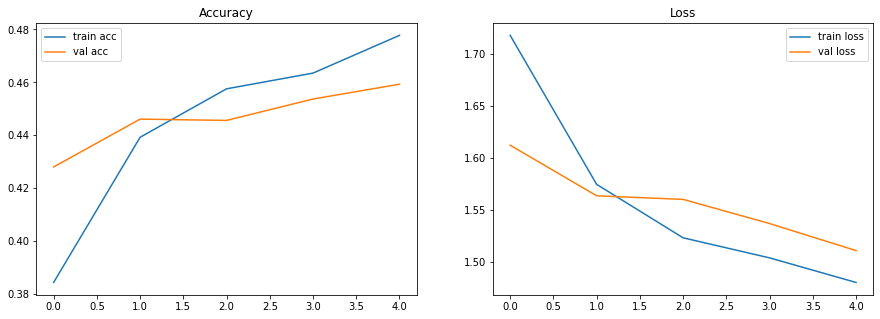

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Accuracy")
plt.plot(history_1["accuracy"],label="train acc")
plt.plot(history_1["val_accuracy"],label="val acc")
plt.legend()

plt.subplot(122)
plt.title("Loss")
plt.plot(history_1["loss"],label="train loss")
plt.plot(history_1["val_loss"],label="val loss")
plt.legend()

plt.show()

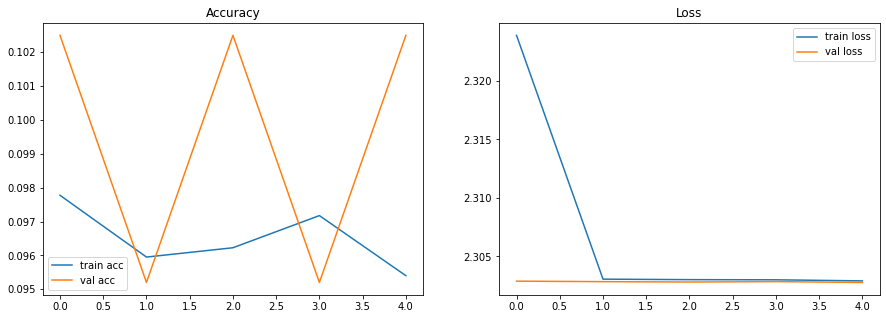

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Accuracy")
plt.plot(history_2["accuracy"],label="train acc")
plt.plot(history_2["val_accuracy"],label="val acc")
plt.legend()

plt.subplot(122)
plt.title("Loss")
plt.plot(history_2["loss"],label="train loss")
plt.plot(history_2["val_loss"],label="val loss")
plt.legend()

plt.show()